## 모의 데이터 생성

        Features1  Features2
record                      
0        4.312395  -9.218799
1        3.600790  -9.110460
2       -2.193675   3.212265
3       -2.976039   3.037043
4       -2.963703   2.336960


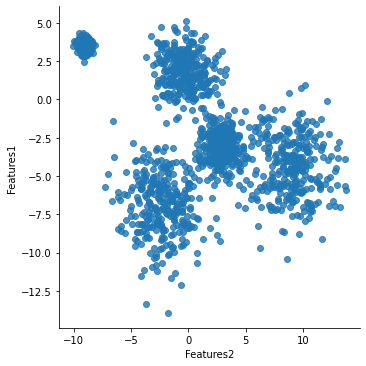

In [12]:
from sklearn import datasets
import seaborn as sns
import pandas as pd

def make_blobs():
    n_samples =1500
    blobs = datasets.make_blobs(n_samples=n_samples, 
                               centers =5, cluster_std=[0.3,0.9,1.9,1.9,1.3],
                               random_state =51)
    
    df= pd.DataFrame(blobs[0],columns=['Features1','Features2'])
    df.index.name = 'record'
    
    return df

df=make_blobs()
print(df.head())


sns.lmplot(x='Features2', y='Features1',data =df, fit_reg=False)

## K-Means

In [13]:
df = make_blobs()

from sklearn.cluster import KMeans
clus = KMeans(n_clusters=5, tol = 0.004, max_iter=300)

clus.fit(df)

df['K-Means Cluster Labels']=clus.labels_
print(df['K-Means Cluster Labels'][:5].tolist())

df.head()

[1, 1, 0, 0, 0]


,Features1,Features2,K-Means Cluster Labels
record,,,
0,4.312395,-9.218799,1
1,3.600790,-9.110460,1
2,-2.193675,3.212265,0
3,-2.976039,3.037043,0
4,-2.963703,2.336960,0


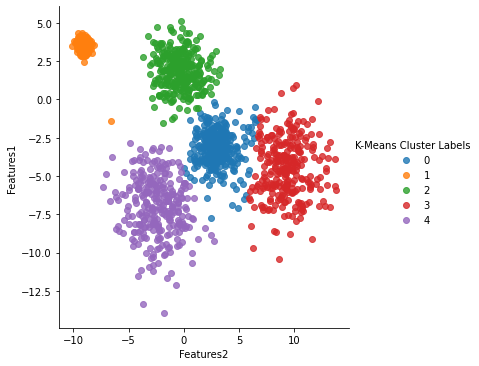

In [15]:
sns.lmplot(x='Features2',y='Features1', hue ='K-Means Cluster Labels', data=df, fit_reg=False)

## 품질 점수 (실루엣)

In [18]:
df = make_blobs()

from sklearn import metrics

n_clusters = [2,3,4,5,6,7,8]
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    cluster_labels = kmeans.predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters={:d}, silhouette score {:f}".format(k,S))

n_clusters=2, silhouette score 0.478940
n_clusters=3, silhouette score 0.509712
n_clusters=4, silhouette score 0.593362
n_clusters=5, silhouette score 0.646083
n_clusters=6, silhouette score 0.609034
n_clusters=7, silhouette score 0.577502
n_clusters=8, silhouette score 0.574019


## K-Means++

In [19]:
clus = KMeans(n_clusters=5, init='k-means++', tol=0.004, max_iter=300)

## Mini Batch k-means

In [20]:
from sklearn.cluster import MiniBatchKMeans
clus= MiniBatchKMeans(n_clusters=5, batch_size=50, tol=0.004, max_iter=300)

## 계층적 클러스터링 (응집적)

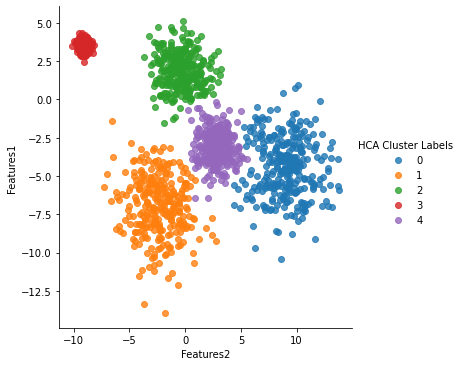

In [21]:
df= make_blobs()

from sklearn.cluster import AgglomerativeClustering
clus= AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean', linkage='ward')

clus.fit(df)

df['HCA Cluster Labels'] = clus.labels_

sns.lmplot(x='Features2', y= 'Features1',
          hue='HCA Cluster Labels', data= df, fit_reg=False)


In [22]:
n_clusters =[2,3,4,5,6,7,8]
for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters=num,
                                 affinity='euclidean', linkage='ward',
                                 memory='.model_storage/dendrogram',
                                 compute_full_tree= True)
    cluster_labels = HCA.fit_predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:f}".format(num,S))

n_clusters = 2, silhouette score 0.525368
n_clusters = 3, silhouette score 0.528641
n_clusters = 4, silhouette score 0.616058
n_clusters = 5, silhouette score 0.680347
n_clusters = 6, silhouette score 0.636984
n_clusters = 7, silhouette score 0.582249
n_clusters = 8, silhouette score 0.579450


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [70.0, 70.0, 106.25, 106.25],
  [55.0, 55.0, 88.125, 88.125],
  [32.5, 32.5, 71.5625, 71.5625],
  [10.0, 10.0, 52.03125, 52.03125],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [143.75, 143.75, 184.375, 184.375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [164.0625, 164.0625, 234.375, 234.375],
  [31.015625, 31.015625, 199.21875, 199.21875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

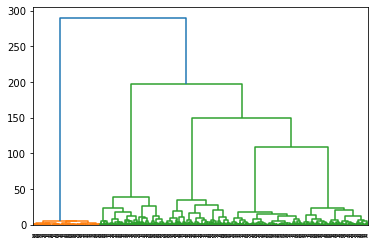

In [24]:
from scipy.cluster import hierarchy

Z= hierarchy.linkage(df,'ward')

hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=2, labels=df.index)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [30.0, 30.0, 76.25, 76.25],
  [5.0, 5.0, 53.125, 53.125]],
 'dcoord': [[0.0, 24.07937988421114, 24.07937988421114, 0.0],
  [0.0, 26.494773187492434, 26.494773187492434, 0.0],
  [24.07937988421114,
   38.682330777866774,
   38.682330777866774,
   26.494773187492434],
  [0.0, 27.13809135901472, 27.13809135901472, 0.0],
  [0.0, 34.307795986605, 34.307795986605, 27.13809135901472],
  [0.0, 109.14299697043626, 109.14299697043626, 0.0],
  [34.307795986605, 149.8596897268663, 149.8596897268663, 109.14299697043626],
  [38.682330777866774,
   197.2938476950297,
   197.2938476950297,
   149.8596897268663],
  [0.0, 289.96886108508727, 289.96886108508727, 197.2938476950297]],
 'ivl': ['(300)',
  '(38)',
  '(135)',
  '(52)',
  '(70)',
  '(93)',
  '(107)',
  '(90)',
  '(323)',
  '(292)'],
 'leav

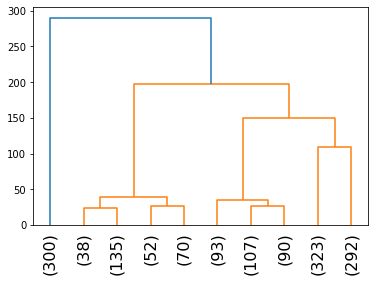

In [25]:
hierarchy.dendrogram(Z,
                    truncate_mode='lastp',
                    p=10, 
                    leaf_rotation=90, leaf_font_size=16, labels=df.index)

## 밀도 클러스터링

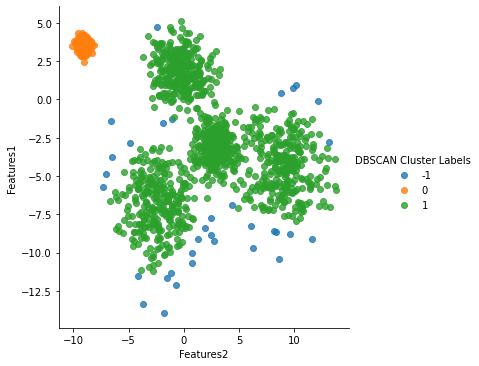

In [27]:
df =make_blobs()

from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')

clus.fit(df)
df['DBSCAN Cluster Labels']=clus.labels_

sns.lmplot(x='Features2', y='Features1', hue='DBSCAN Cluster Labels', data= df, fit_reg=False)

## Spectrum clustering

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


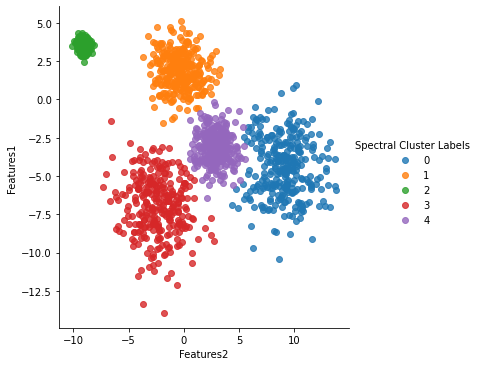

In [29]:
df= make_blobs()

from sklearn.cluster import SpectralClustering
clus= SpectralClustering(n_clusters=5, random_state=42, assign_labels='kmeans', n_init=10,
                        affinity='nearest_neighbors', n_neighbors=10)
clus.fit(df)

df['Spectral Cluster Labels'] = clus.labels_

sns.lmplot(x='Features2',y='Features1',
          hue='Spectral Cluster Labels', data=df, fit_reg=False)

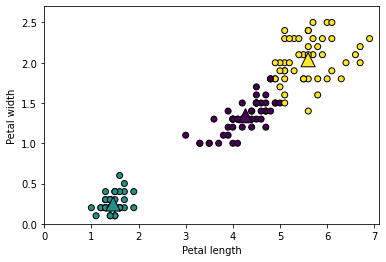

In [35]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

k_means= cluster.KMeans(n_clusters=3).fit(X)
y_pred = k_means.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred, cmap='viridis', edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c=[0,1,2], cmap='viridis', marker='^',
           s=200, edgecolor='k')
plt.axis([0,X[:,0].max()+0.2,0,X[:,1].max()+0.2])

plt.show()